In [1]:
import os
from src.viz.plotting import plot_boundary
from src.maps.function_space_map import FunctionSpaceMap
from src.geometry.remove_rigid_body import RigidRemover
from src.pde.metamaterial import Metamaterial
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.arguments import parser
import sys

sys.argv = ['-f']
args = parser.parse_args()

In [2]:
for root, dirs, files in os.walk("/efs_nmor/results"):
    for f in files:
        print(os.path.join(root, f))

/efs_nmor/results/bV5_4/default_0/args.txt
/efs_nmor/results/bv5_2/default_0/args.txt
/efs_nmor/results/bV5/initial_datasets.pt
/efs_nmor/results/bV5/default_4/args.txt
/efs_nmor/results/bV5/default_0/args.txt
/efs_nmor/results/bV5/default_6/args.txt
/efs_nmor/results/bV5/default_2/events.out.tfevents.1568087537.ip-172-31-13-210
/efs_nmor/results/bV5/default_2/ckpt.pt
/efs_nmor/results/bV5/default_2/args.txt
/efs_nmor/results/bV5/default_2/losses.txt
/efs_nmor/results/bV5/default_5/args.txt
/efs_nmor/results/bV5/default_1/args.txt
/efs_nmor/results/bV5/default_3/ckpt.pt
/efs_nmor/results/bV5/default_3/exception.txt
/efs_nmor/results/bV5/default_3/events.out.tfevents.1568088094.ip-172-31-8-12
/efs_nmor/results/bV5/default_3/args.txt
/efs_nmor/results/bV5/default_3/losses.txt
/efs_nmor/results/bV5_3/default_0/args.txt


In [3]:
datasets = torch.load('/efs_nmor/results/bV5/initial_datasets.pt')

In [4]:
train_data = datasets['train_data']
val_data = datasets['val_data']

In [5]:
pde = Metamaterial(args)
fsm = FunctionSpaceMap(pde.V, args.bV_dim, cuda=False)
rigid_remover = RigidRemover(fsm)

In [6]:
for _ in range(4):
    i = np.random.randint(len(train_data))
    print(train_data[i])
    j = np.random.randint(len(val_data))
    print(val_data[j])

(tensor([-0.0080,  0.0207, -0.0083,  0.0198, -0.0079,  0.0191, -0.0090,  0.0183,
        -0.0078,  0.0172, -0.0101,  0.0161, -0.0079,  0.0150, -0.0116,  0.0134,
        -0.0080,  0.0127, -0.0116,  0.0115, -0.0088,  0.0117, -0.0116,  0.0096,
        -0.0097,  0.0102, -0.0117,  0.0076, -0.0107,  0.0082, -0.0118,  0.0057]), tensor([0., 0.]), tensor([0.0004]), tensor([ 7.1326e-04,  1.3957e-03,  3.5766e-05,  5.1527e-03,  7.2296e-03,
         1.2349e-02,  3.6247e-04,  8.8311e-03,  1.8950e-03,  2.6182e-02,
        -7.8019e-03, -9.8363e-03, -4.9486e-03,  2.8385e-03,  1.9746e-03,
        -4.5752e-03,  2.5368e-03, -2.9390e-03, -6.0800e-04, -3.6315e-03,
        -6.9185e-04, -1.6452e-03, -4.4843e-04,  1.6672e-03, -1.0731e-03,
        -4.4085e-04,  2.7613e-04, -1.1806e-03,  4.4741e-04, -1.0965e-05,
        -4.1697e-04, -9.4331e-04]))
(tensor([ 9.5080e-03,  7.2989e-03,  2.8169e-03,  1.4777e-02,  3.1311e-03,
        -4.4608e-03,  2.3275e-02, -4.4686e-03, -3.0904e-03, -1.9858e-02,
        -1.7513e-03,

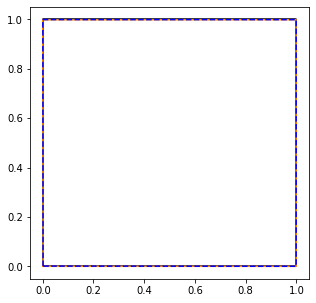

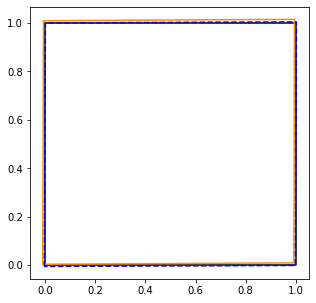

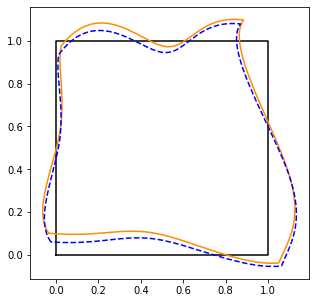

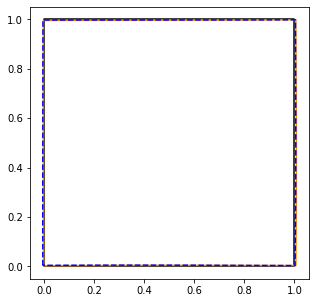

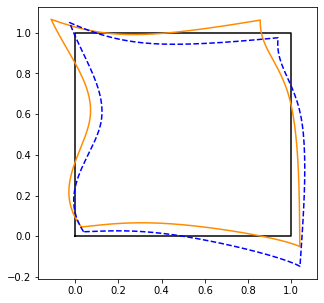

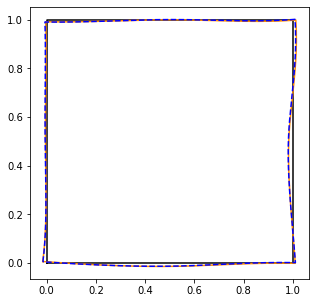

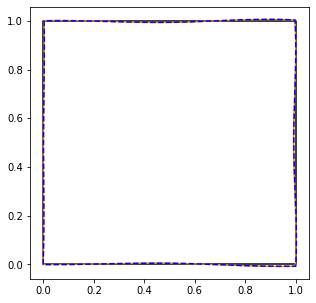

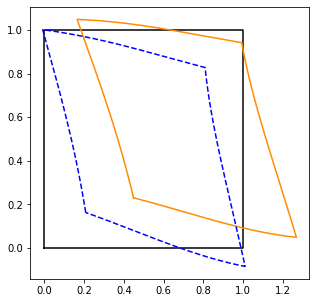

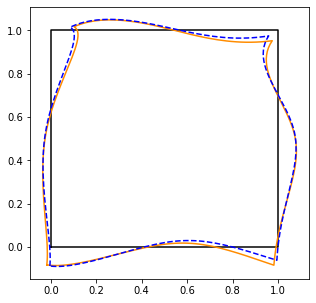

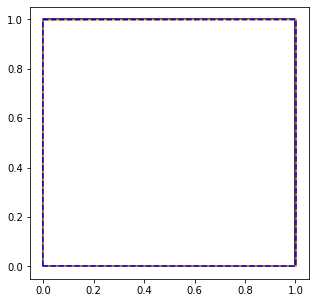

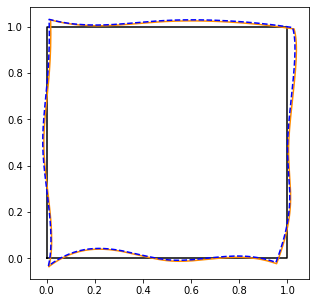

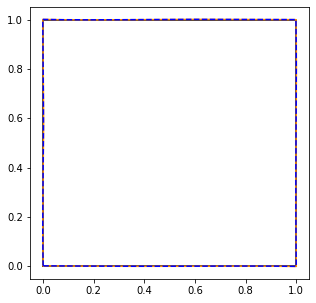

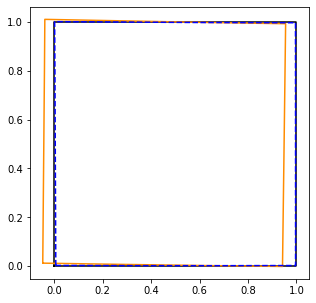

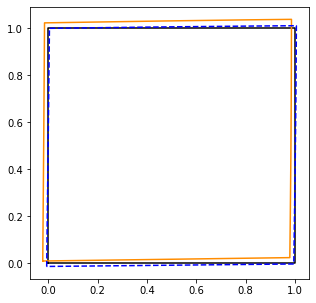

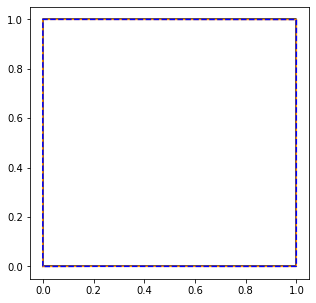

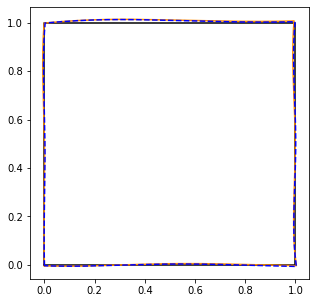

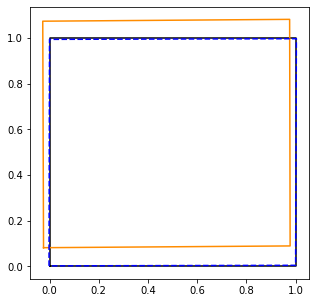

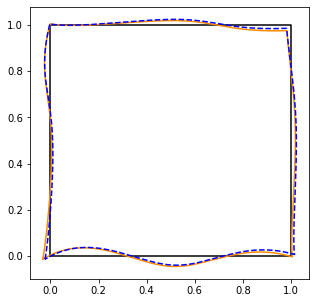

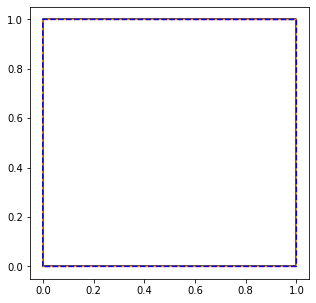

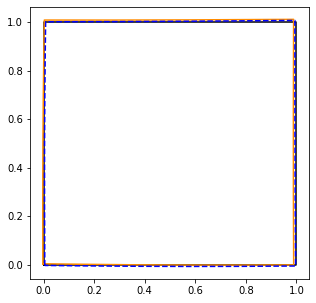

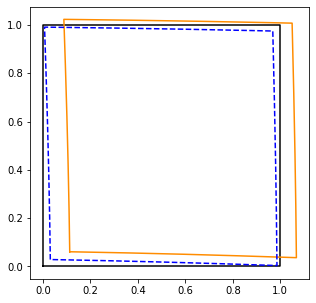

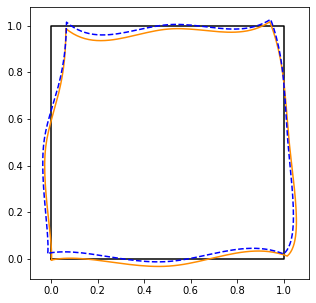

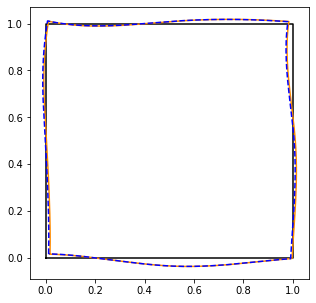

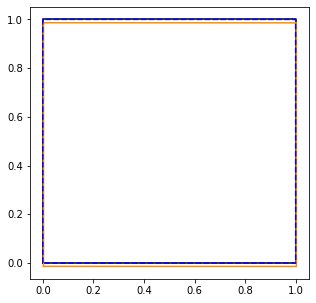

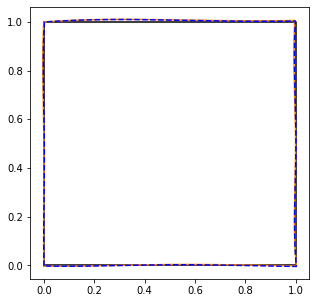

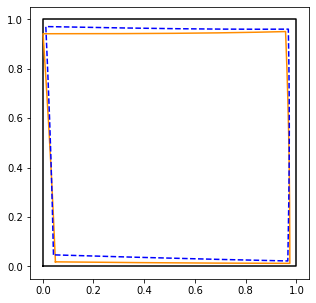

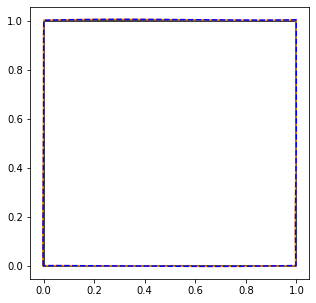

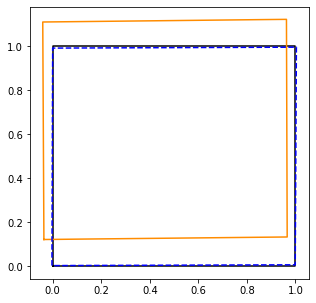

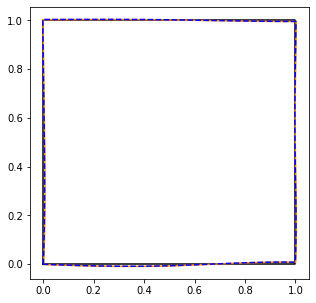

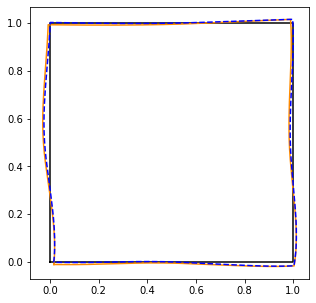

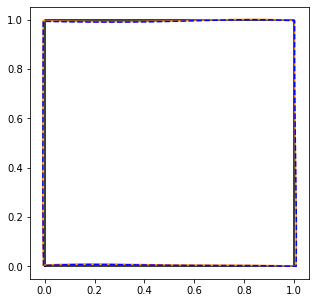

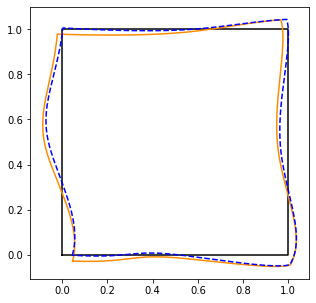

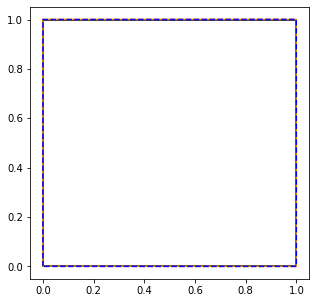

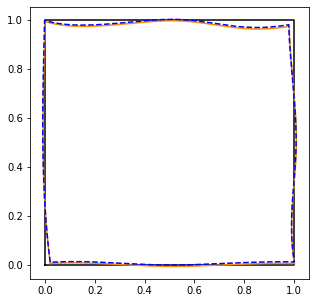

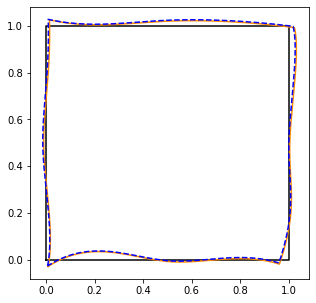

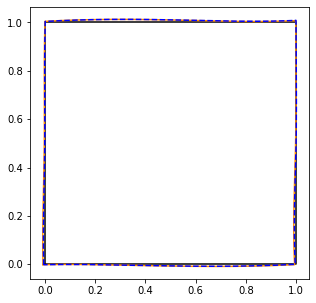

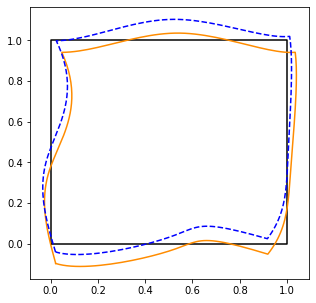

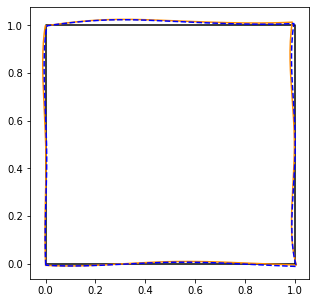

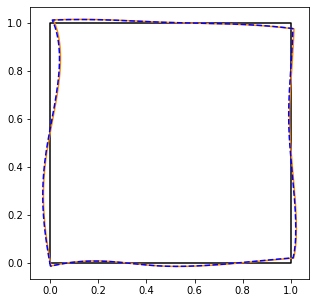

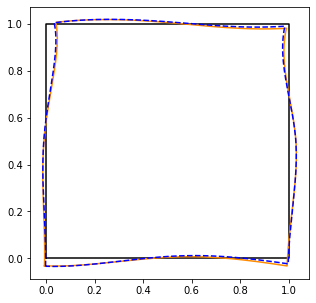

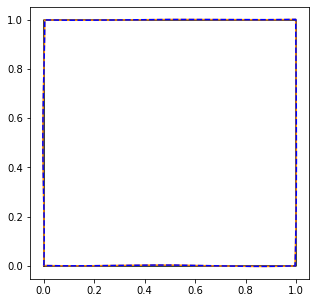

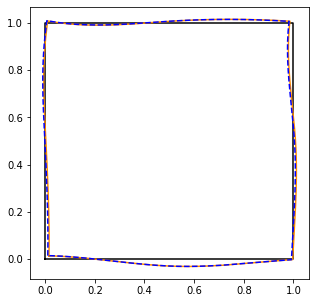

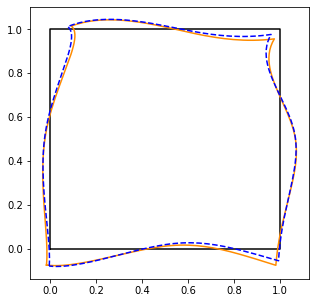

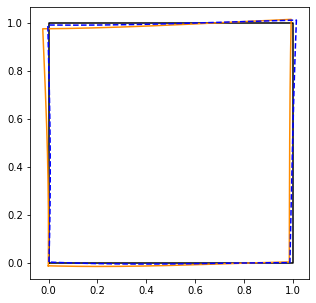

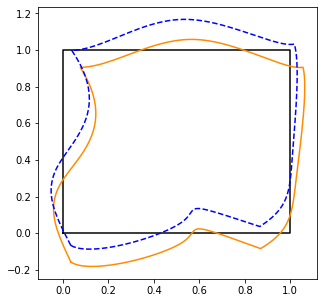

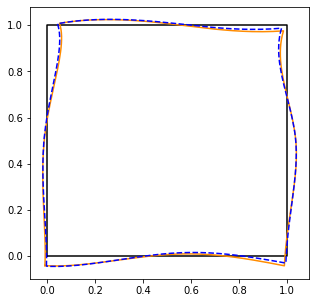

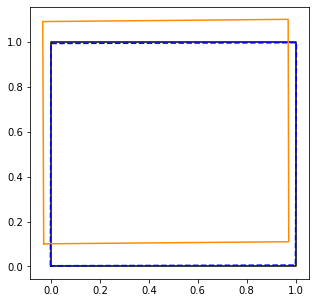

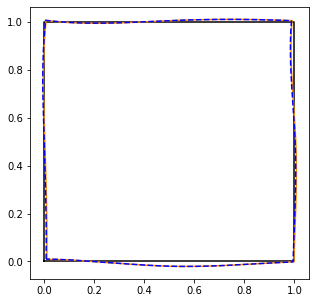

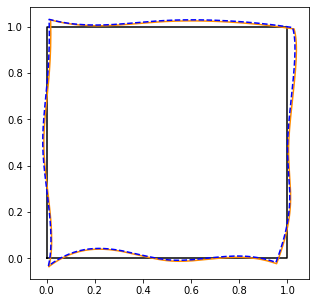

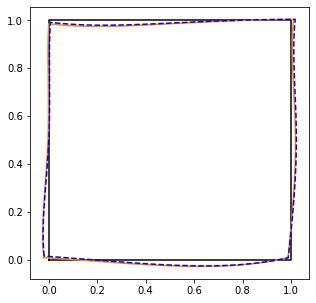

In [7]:
for _ in range(50):
    i = np.random.randint(len(train_data))
    u, p, f, J = train_data[i]
    # for u, p, f, J in np.random.choice(train_data, size=4): 
    plt.figure(figsize=(5,5))
    plot_boundary(
        lambda x: (0, 0),
        200,
        label="reference",
        color="k",
    )
    plot_boundary(
        fsm.get_query_fn(u),
        200,
        label="ub, f={:.3e}".format(f.item()),
        linestyle="-",
        color="darkorange",
    )
    plot_boundary(
        fsm.get_query_fn(
            rigid_remover(u.unsqueeze(0)).squeeze(0)
        ),
        200,
        label="rigid removed",
        linestyle="--",
        color="blue",
    )
    plt.legend()
    plt.show()

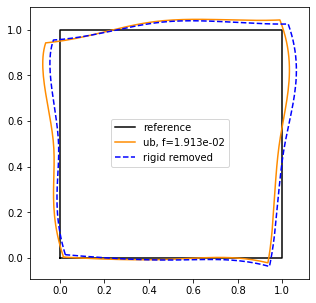

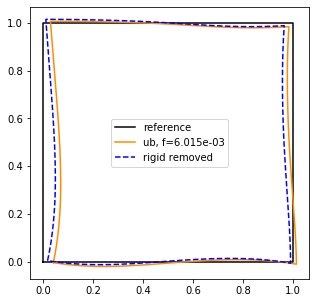

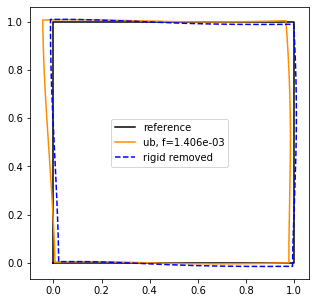

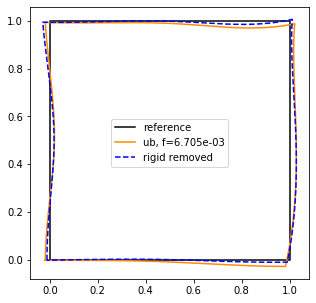

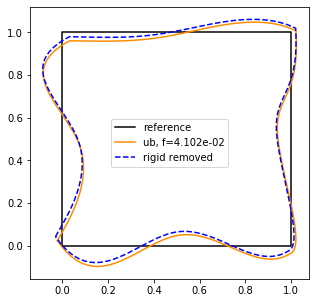

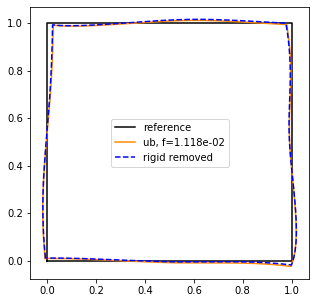

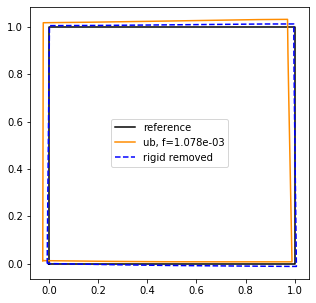

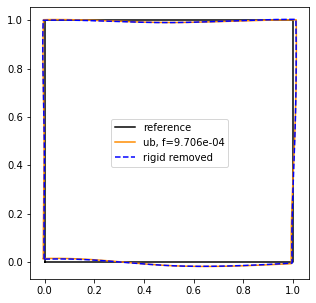

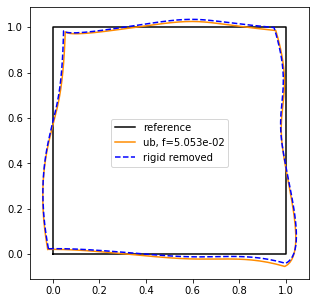

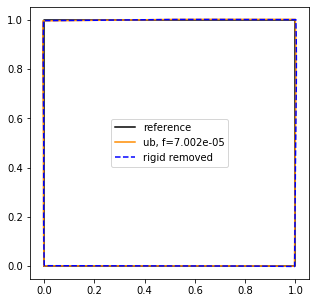

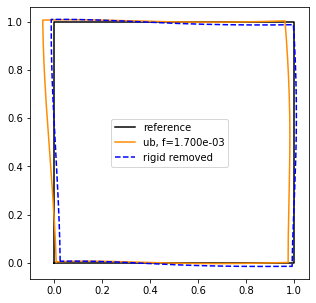

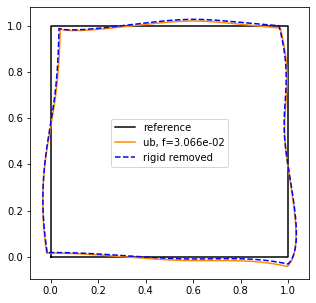

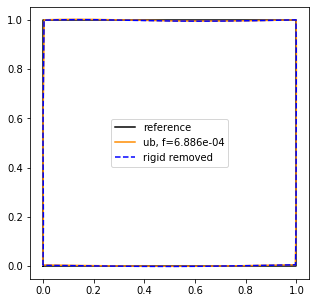

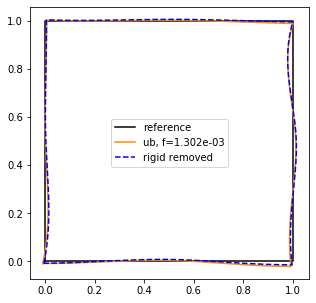

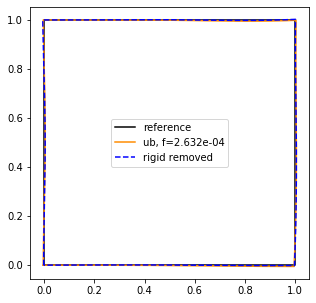

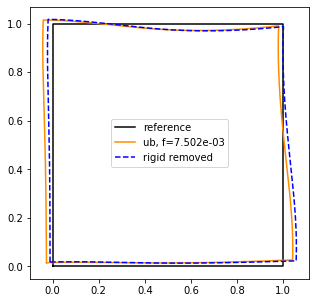

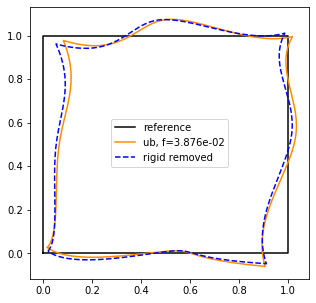

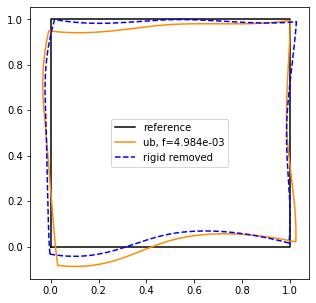

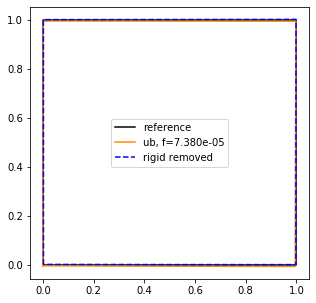

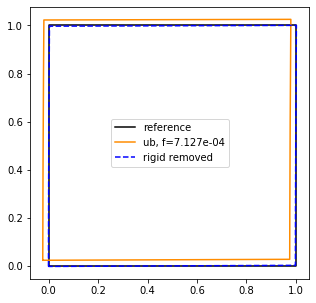

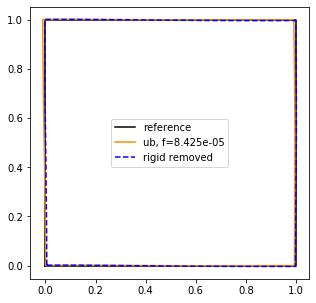

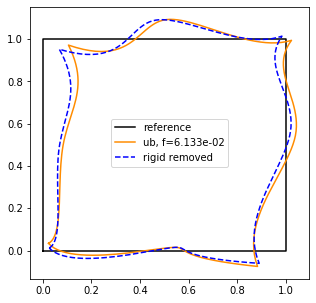

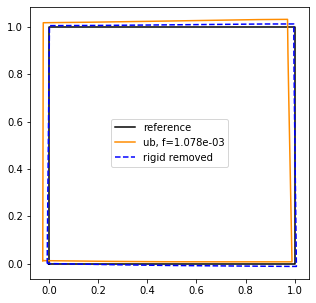

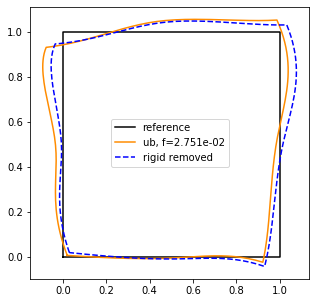

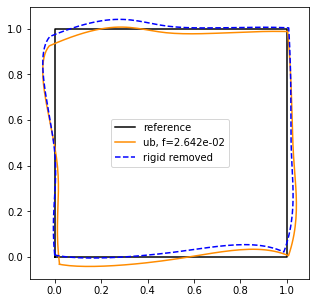

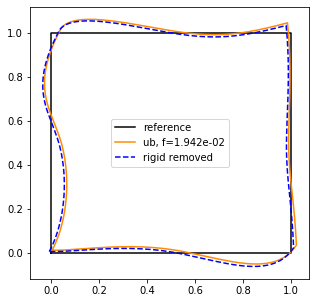

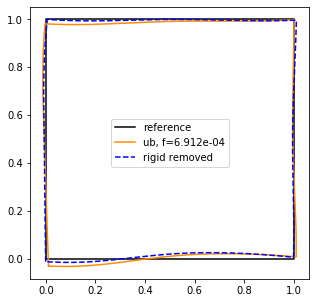

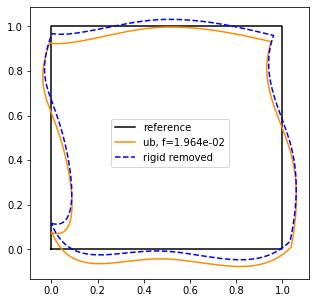

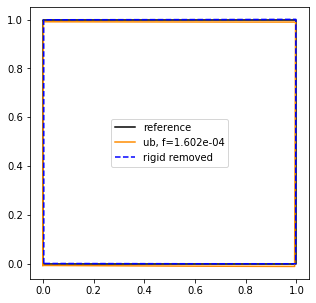

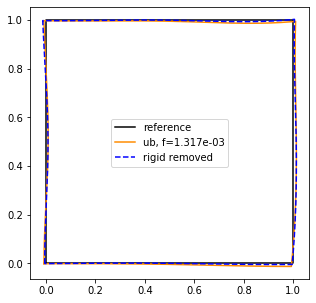

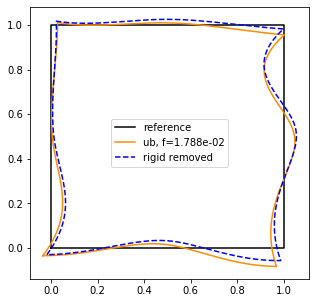

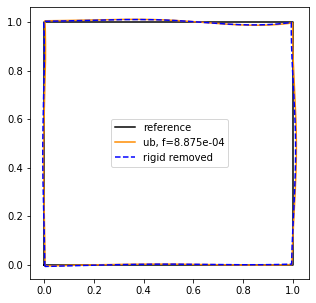

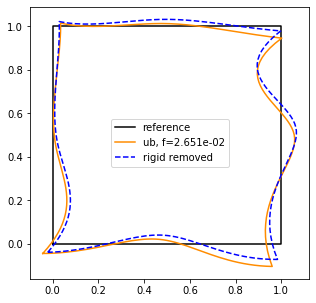

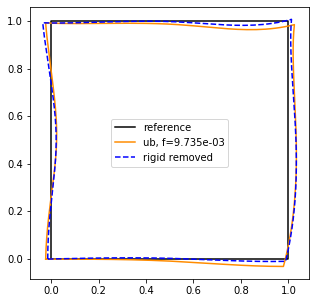

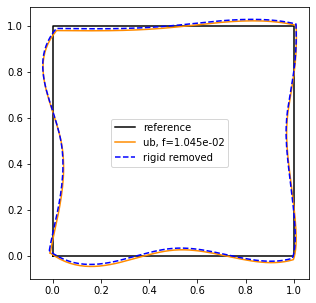

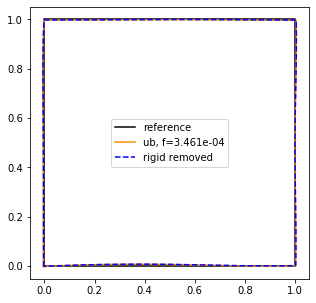

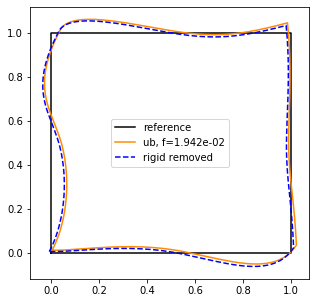

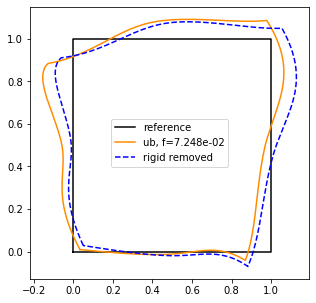

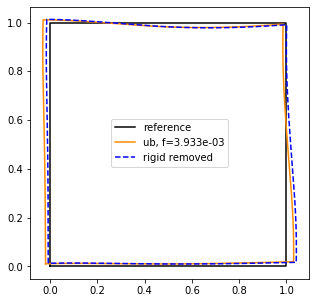

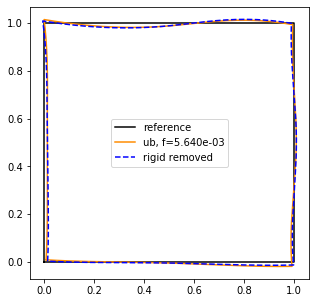

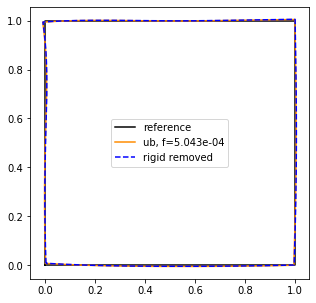

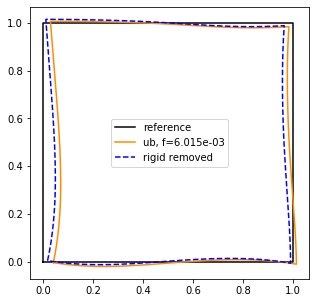

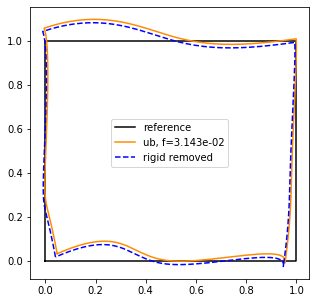

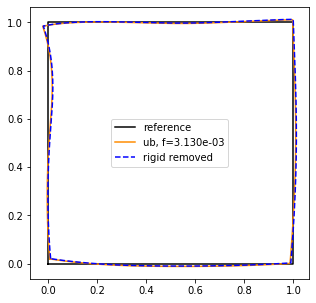

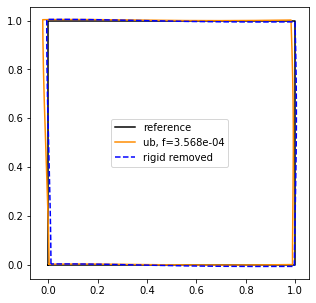

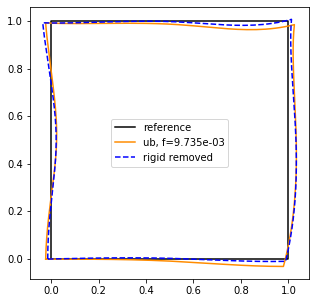

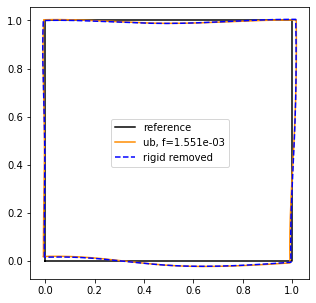

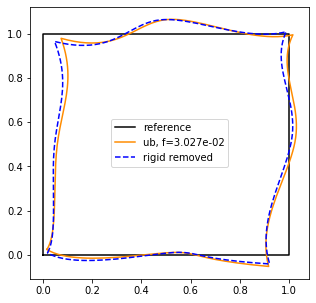

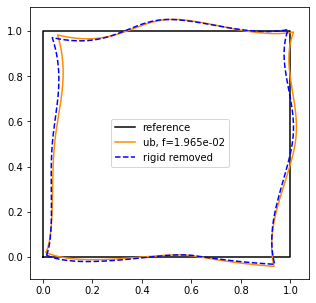

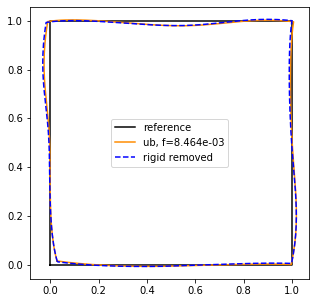

In [8]:
for _ in range(50):
    i = np.random.randint(len(val_data))
    u, p, f, J = val_data[i]
    # for u, p, f, J in np.random.choice(train_data, size=4): 
    plt.figure(figsize=(5,5))
    plot_boundary(
        lambda x: (0, 0),
        200,
        label="reference",
        color="k",
    )
    plot_boundary(
        fsm.get_query_fn(u),
        200,
        label="ub, f={:.3e}".format(f.item()),
        linestyle="-",
        color="darkorange",
    )
    plot_boundary(
        fsm.get_query_fn(
            rigid_remover(u.unsqueeze(0)).squeeze(0)
        ),
        200,
        label="rigid removed",
        linestyle="--",
        color="blue",
    )
    plt.legend()
    plt.show()